In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [9]:
file_path = 'Mall_Customers.csv'
data = pd.read_csv(file_path)

In [10]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [11]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [12]:
X = data[['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)']].values
le_sex = preprocessing.LabelEncoder()
le_sex.fit(['Female','Male'])
X[:,1] = le_sex.transform(X[:,1])
print(X)

[[1 1 19 15 39]
 [2 1 21 15 81]
 [3 0 20 16 6]
 [4 0 23 16 77]
 [5 0 31 17 40]
 [6 0 22 17 76]
 [7 0 35 18 6]
 [8 0 23 18 94]
 [9 1 64 19 3]
 [10 0 30 19 72]
 [11 1 67 19 14]
 [12 0 35 19 99]
 [13 0 58 20 15]
 [14 0 24 20 77]
 [15 1 37 20 13]
 [16 1 22 20 79]
 [17 0 35 21 35]
 [18 1 20 21 66]
 [19 1 52 23 29]
 [20 0 35 23 98]
 [21 1 35 24 35]
 [22 1 25 24 73]
 [23 0 46 25 5]
 [24 1 31 25 73]
 [25 0 54 28 14]
 [26 1 29 28 82]
 [27 0 45 28 32]
 [28 1 35 28 61]
 [29 0 40 29 31]
 [30 0 23 29 87]
 [31 1 60 30 4]
 [32 0 21 30 73]
 [33 1 53 33 4]
 [34 1 18 33 92]
 [35 0 49 33 14]
 [36 0 21 33 81]
 [37 0 42 34 17]
 [38 0 30 34 73]
 [39 0 36 37 26]
 [40 0 20 37 75]
 [41 0 65 38 35]
 [42 1 24 38 92]
 [43 1 48 39 36]
 [44 0 31 39 61]
 [45 0 49 39 28]
 [46 0 24 39 65]
 [47 0 50 40 55]
 [48 0 27 40 47]
 [49 0 29 40 42]
 [50 0 31 40 42]
 [51 0 49 42 52]
 [52 1 33 42 60]
 [53 0 31 43 54]
 [54 1 59 43 60]
 [55 0 50 43 45]
 [56 1 47 43 41]
 [57 0 51 44 50]
 [58 1 69 44 46]
 [59 0 27 46 51]
 [60 1 53 46

<function matplotlib.pyplot.show(close=None, block=None)>

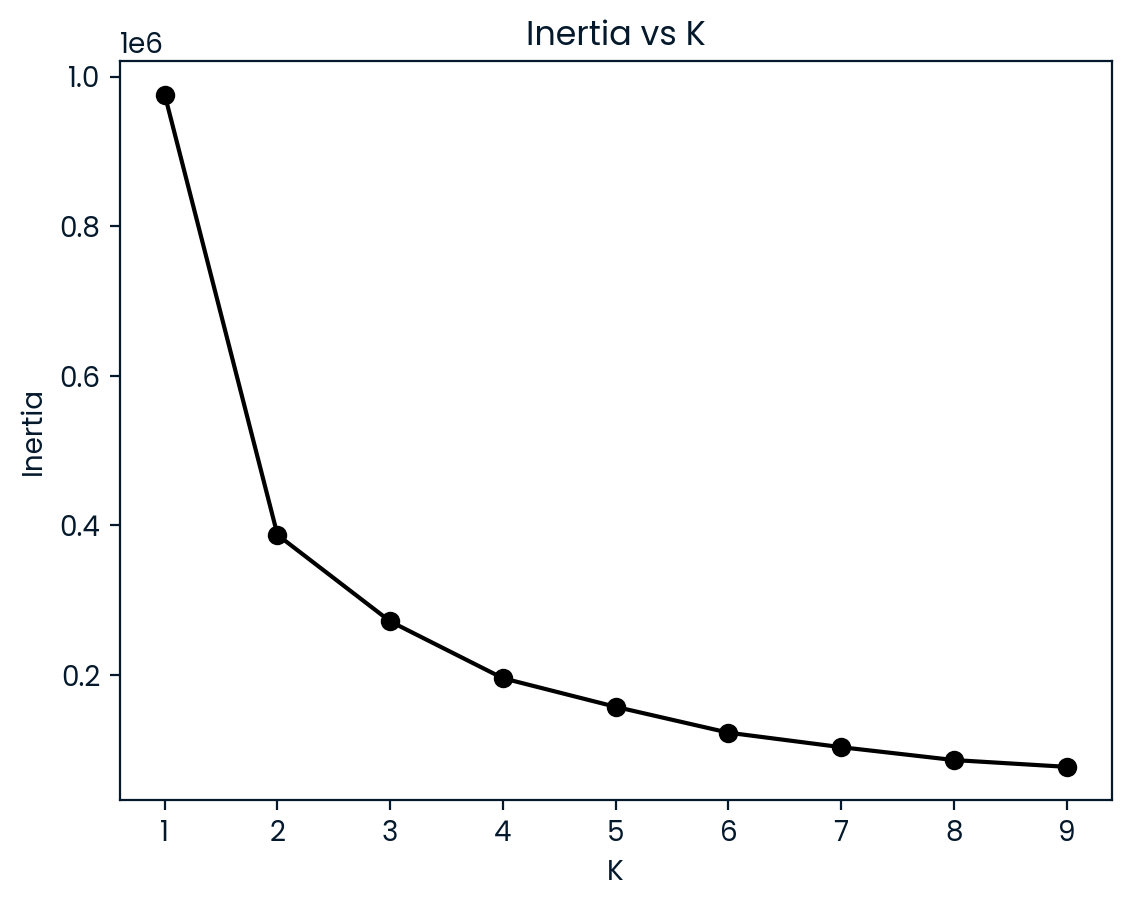

In [13]:
inertias =[]
for i in range(1,10):
    kmeans = KMeans(init="k-means++",n_init=20,n_clusters=i)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)
plt.plot(range(1,10),inertias,"k-o")
plt.ylabel('Inertia')
plt.xlabel('K')
plt.title("Inertia vs K")
plt.show

In [14]:
k_means = KMeans(n_clusters = 4)
k_means.fit(X)
labels = k_means.predict(X)
print(labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3]


In [15]:
data["Cluster"] = labels
data.tail(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
190,191,Female,34,103,23,1
191,192,Female,32,103,69,3
192,193,Male,33,113,8,1
193,194,Female,38,113,91,3
194,195,Female,47,120,16,1
195,196,Female,35,120,79,3
196,197,Female,45,126,28,1
197,198,Male,32,126,74,3
198,199,Male,32,137,18,1
199,200,Male,30,137,83,3


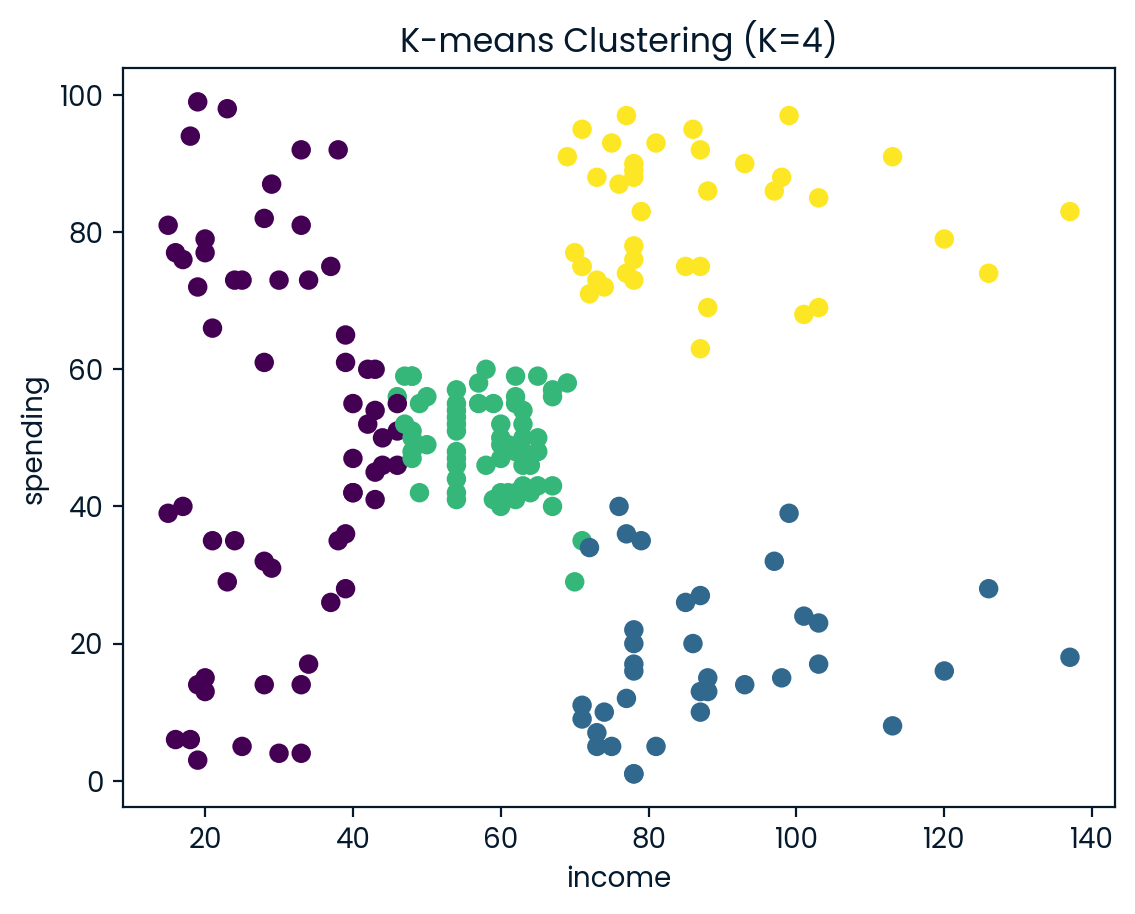

In [16]:
plt.scatter(data["Annual Income (k$)"],data["Spending Score (1-100)"],c=labels)
plt.xlabel('income')
plt.ylabel('spending')
plt.title(f'K-means Clustering (K={4})')
plt.show()

In [17]:
data.to_csv("Output.csv")